In [1]:

# import module to pull stock data from yahoo finance
import yfinance as yf

# import pandas and numpy
import pandas as pd
import numpy as np

In [8]:
import pandas as pd
import requests
from bs4 import BeautifulSoup

def getSP500():
    url = 'https://en.wikipedia.org/wiki/List_of_S%26P_500_companies'
    headers = {'User-Agent': 'Mozilla/5.0'}

    # Fetch the page with a browser-like header
    response = requests.get(url, headers=headers)
    soup = BeautifulSoup(response.text, 'lxml')

    # Find the first table and parse it
    table = pd.read_html(str(soup.find('table')))[0]

    # Replace '.' with '-' for compatibility
    tickers = [ticker.replace('.', '-') for ticker in table['Symbol'].tolist()]
    return ",".join(tickers)

ticker_names = getSP500()
print(ticker_names)


MMM,AOS,ABT,ABBV,ACN,ADBE,AMD,AES,AFL,A,APD,ABNB,AKAM,ALB,ARE,ALGN,ALLE,LNT,ALL,GOOGL,GOOG,MO,AMZN,AMCR,AEE,AEP,AXP,AIG,AMT,AWK,AMP,AME,AMGN,APH,ADI,AON,APA,APO,AAPL,AMAT,APP,APTV,ACGL,ADM,ANET,AJG,AIZ,T,ATO,ADSK,ADP,AZO,AVB,AVY,AXON,BKR,BALL,BAC,BAX,BDX,BRK-B,BBY,TECH,BIIB,BLK,BX,XYZ,BK,BA,BKNG,BSX,BMY,AVGO,BR,BRO,BF-B,BLDR,BG,BXP,CHRW,CDNS,CPT,CPB,COF,CAH,KMX,CCL,CARR,CAT,CBOE,CBRE,CDW,COR,CNC,CNP,CF,CRL,SCHW,CHTR,CVX,CMG,CB,CHD,CI,CINF,CTAS,CSCO,C,CFG,CLX,CME,CMS,KO,CTSH,COIN,CL,CMCSA,CAG,COP,ED,STZ,CEG,COO,CPRT,GLW,CPAY,CTVA,CSGP,COST,CTRA,CRWD,CCI,CSX,CMI,CVS,DHR,DRI,DDOG,DVA,DAY,DECK,DE,DELL,DAL,DVN,DXCM,FANG,DLR,DG,DLTR,D,DPZ,DASH,DOV,DOW,DHI,DTE,DUK,DD,EMN,ETN,EBAY,ECL,EIX,EW,EA,ELV,EME,EMR,ETR,EOG,EPAM,EQT,EFX,EQIX,EQR,ERIE,ESS,EL,EG,EVRG,ES,EXC,EXE,EXPE,EXPD,EXR,XOM,FFIV,FDS,FICO,FAST,FRT,FDX,FIS,FITB,FSLR,FE,FI,F,FTNT,FTV,FOXA,FOX,BEN,FCX,GRMN,IT,GE,GEHC,GEV,GEN,GNRC,GD,GIS,GM,GPC,GILD,GPN,GL,GDDY,GS,HAL,HIG,HAS,HCA,DOC,HSIC,HSY,HPE,HLT,HOLX,HD,HON,HRL,HST,HWM,HPQ,HUBB,HUM,H

C:\Users\Jett\AppData\Local\Temp\ipykernel_18336\1933792040.py:14: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  table = pd.read_html(str(soup.find('table')))[0]


In [9]:
data = yf.download(ticker_names, start="2020-01-01", end="2021-01-01")

C:\Users\Jett\AppData\Local\Temp\ipykernel_18336\2362689934.py:1: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker_names, start="2020-01-01", end="2021-01-01")
[*********************100%***********************]  503 of 503 completed

10 Failed downloads:
['APP', 'KVUE', 'HOOD', 'GEV', 'COIN', 'GEHC', 'SOLV', 'VLTO', 'CEG', 'EXE']: YFPricesMissingError('possibly delisted; no price data found  (1d 2020-01-01 -> 2021-01-01) (Yahoo error = "Data doesn\'t exist for startDate = 1577854800, endDate = 1609477200")')


In [10]:
# get daily close prices and drop missing columns
df_close = data['Adj Close'].dropna(axis='columns')

# define list of column names
col_names = df_close.columns.to_list()

# display pandas dataframe of close prices
df_close

Ticker
Date
2020-01-02
2020-01-03
2020-01-06
2020-01-07
2020-01-08
...
2020-12-24
2020-12-28
2020-12-29


In [12]:
df_close = df_close.dropna()


In [15]:
%matplotlib inline


In [18]:
print(df_close.shape)
print(df_close.head())


(253, 0)
Empty DataFrame
Columns: []
Index: [2020-01-02 00:00:00, 2020-01-03 00:00:00, 2020-01-06 00:00:00, 2020-01-07 00:00:00, 2020-01-08 00:00:00]


In [19]:
import yfinance as yf
import pandas as pd

# Define a few tickers to test — you can expand this later
tickers = ['AAPL', 'MSFT', 'GOOGL', 'AMZN', 'TSLA']

# Download daily close prices for 2020
df = yf.download(tickers, start='2020-01-01', end='2020-12-31')['Close']

# Drop rows with missing values
df_close = df.dropna()

# Check the shape and preview
print(df_close.shape)
print(df_close.head())


C:\Users\Jett\AppData\Local\Temp\ipykernel_18336\1486336176.py:8: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(tickers, start='2020-01-01', end='2020-12-31')['Close']
[*********************100%***********************]  5 of 5 completed

(252, 5)
Ticker           AAPL       AMZN      GOOGL        MSFT       TSLA
Date                                                              
2020-01-02  72.538513  94.900497  67.965225  152.791092  28.684000
2020-01-03  71.833290  93.748497  67.609688  150.888596  29.534000
2020-01-06  72.405670  95.143997  69.411758  151.278641  30.102667
2020-01-07  72.065163  95.343002  69.277687  149.899307  31.270666
2020-01-08  73.224411  94.598503  69.770790  152.286957  32.809334


In [20]:
from sklearn.preprocessing import StandardScaler

X = StandardScaler().fit_transform(df_close.to_numpy())


In [21]:
from sklearn.decomposition import PCA

pca = PCA(n_components=5)  # You have 5 stocks, so max 5 components
X_pca = pca.fit_transform(X)


In [22]:
print("Explained Variance Ratio:")
print(pca.explained_variance_ratio_)


Explained Variance Ratio:
[0.90161922 0.05608172 0.03106758 0.00789993 0.00333155]


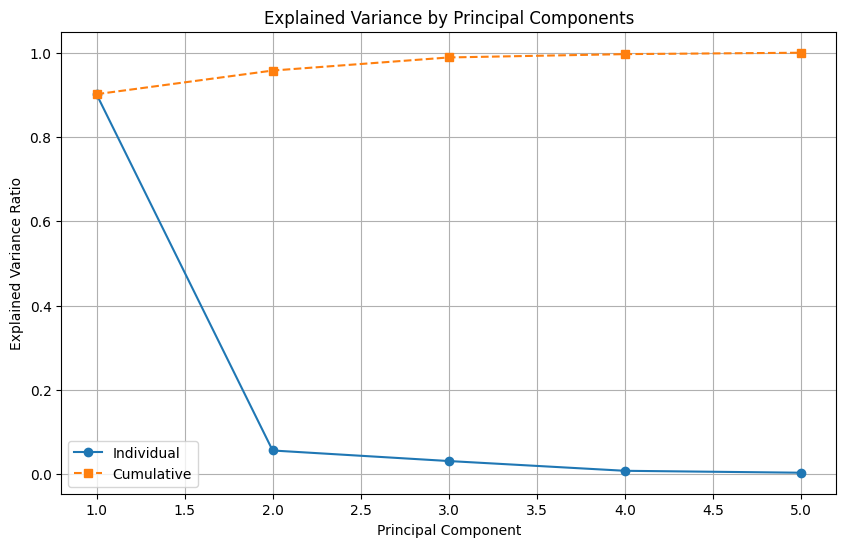

In [23]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(10, 6))
plt.plot(range(1, 6), pca.explained_variance_ratio_, marker='o', label='Individual')
plt.plot(range(1, 6), np.cumsum(pca.explained_variance_ratio_), marker='s', linestyle='--', label='Cumulative')
plt.title('Explained Variance by Principal Components')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.legend()
plt.grid(True)
plt.show()


In [27]:
pca = PCA(n_components=5)


In [ ]:
pca = PCA(n_components=2)


In [29]:
X_pca = pca.fit_transform(X)
print("Explained Variance Ratio:", pca.explained_variance_ratio_)


Explained Variance Ratio: [0.90161922 0.05608172]


<Axes: >

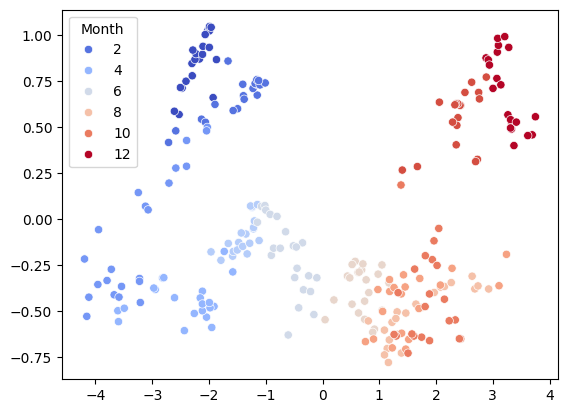

In [31]:
import seaborn as sns

# Example: color by month
df_close['Month'] = df_close.index.month
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=df_close['Month'], palette='coolwarm')
